In [1]:
import sys
sys.path.append(sys.path[0] + '/../cpp/bin')

import PyMorpionSolitaire

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from random import randrange
from tqdm import tqdm

In [3]:
def one_game(mc_sample_size = 1000):
    game = PyMorpionSolitaire.Game5T('c')
    game.playAtRandom()
    max_score = game.getScore()
    score = randrange(max_score + 1)
    game.revertToScore(score)
    grid = game.image()[48:144, 48:144]
    number_of_moves = game.getNumberOfMoves()
    for _ in range(mc_sample_size):
        game.playAtRandom()
        max_score = max(max_score, game.getScore())
        game.revertToScore(score)
    return grid, score, number_of_moves, max_score

In [4]:
def one_batch(batch_size = 200, mc_sample_size = 1000):
    grids, scores, moves, max_scores = list(zip(*[one_game(mc_sample_size) for _ in range(batch_size)]))
    return np.array(grids), np.array(scores), np.array(moves), np.array(max_scores)

# Analyze one big batch

In [5]:
grids, scores, moves, max_scores = one_batch(10000)

In [6]:
def plot_histogram(data, xlabel = "", ylabel = "Count", **kwargs):
    bins = [n - 0.5 for n in range(max(data) + 2)]
    count, bins = np.histogram(data, bins=bins)
    plt.step(bins, np.append(count, 0),  **kwargs)
    plt.xlim((-0.5, max(data) + 0.5))
    plt.ylim(0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

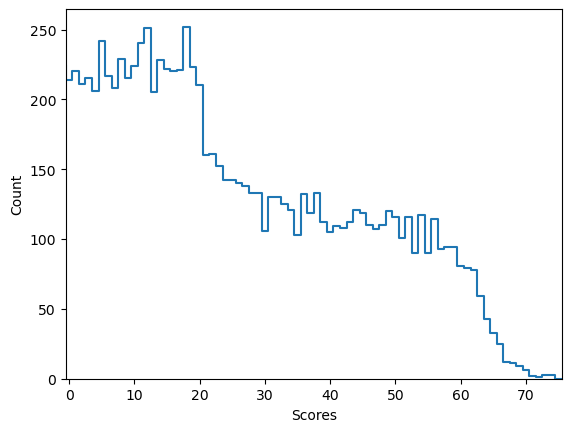

In [8]:
plot_histogram(scores, "Scores")

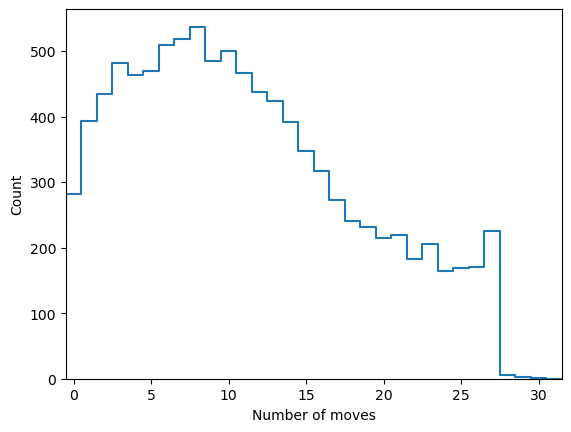

In [9]:
plot_histogram(moves, "Number of moves")

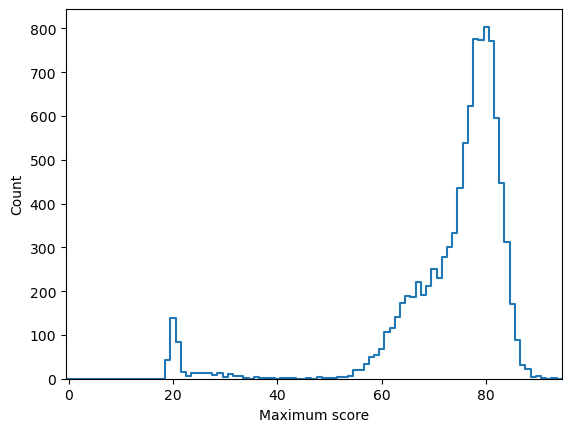

In [10]:
plot_histogram(max_scores, "Maximum score")

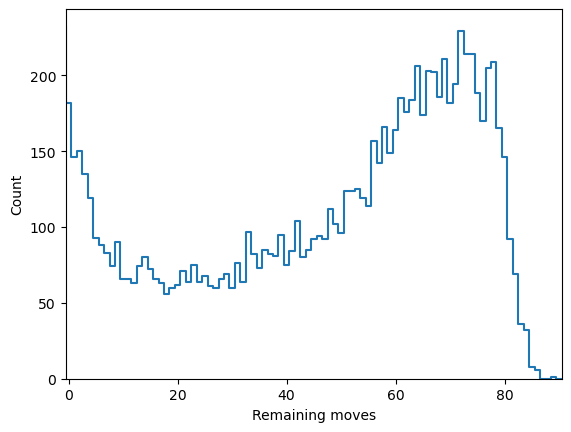

In [11]:
plot_histogram(max_scores - scores, "Remaining moves")

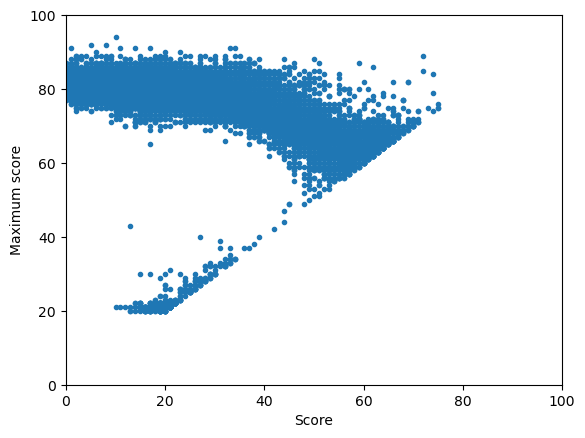

In [17]:
plt.scatter(scores, max_scores, marker='.')
plt.xlabel("Score")
plt.xlim((0, 100))
plt.ylabel("Maximum score")
plt.ylim((0, 100))
plt.show()

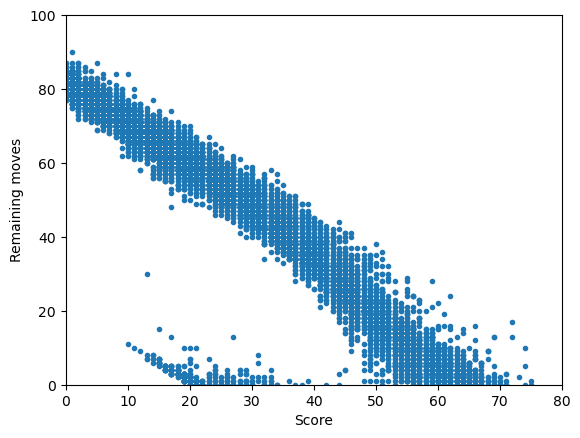

In [16]:
plt.scatter(scores, max_scores - scores, marker='.')
plt.xlabel("Score")
plt.xlim((0, 80))
plt.ylabel("Remaining moves")
plt.ylim((0, 100))
plt.show()

# Store data

In [ ]:
for i in tqdm(range(2500,3000)):
    grids, scores, moves, max_scores = one_batch()
    np.save("data/grids_%05d.npy" % i, grids)
    np.save("data/scores_%05d.npy" % i, scores)
    np.save("data/moves_%05d.npy" % i, moves)
    np.save("data/max_scores_%05d.npy" % i, max_scores)